# vision.transform

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.vision import * 
from fastai import *

`vision.transform` provides classes and functions to handle data augmentation in computer vision.

## Data augmentation

If you want to quickly get a set of random transforms that have proved to work well in a wide range of tasks, you should use the [<code>get_transforms</code>](http://docs.fast.ai/vision.transform.html#get_transforms) function. The most important parameters to adjust are *do\_flip* and *flip\_vert*, depending on the type of images you have.

In [ ]:
show_doc(get_transforms,  arg_comments={
    'do_flip': 'if True, a random flip is applied with probability 0.5',
    'flip_vert': 'requires do_flip=True. If True, the image can be flipped vertically or rotated of 90 degrees, otherwise only an horizontal flip is applied',
    'max_rotate': 'if not None, a random rotation between -max\_rotate and max\_rotate degrees is applied with probability p\_affine',
    'max_zoom': 'if not 1. or less, a random zoom betweem 1. and max\_zoom is applied with probability p\_affine',
    'max_lighting': 'if not None, a random lightning and contrast change controlled by max\_lighting is applied with probability p\_lighting',
    'max_warp': 'if not None, a random symmetric warp of magnitude between -max\_warp and maw\_warp is applied with probability p\_affine',    
    'p_affine': 'the probability that each affine transform and symmetric warp is applied',
    'p_lighting': 'the probability that each lighting transform is applied',
    'xtra_tfms': 'a list of additional transforms you would like to be applied'
})

#### <a id=get_transforms></a>`get_transforms`
(<code>do_flip</code>:<code>bool</code>=`True`, <code>flip_vert</code>:<code>bool</code>=`False`, <code>max_rotate</code>:<code>float</code>=`10.0`, <code>max_zoom</code>:<code>float</code>=`1.1`, <code>max_lighting</code>:<code>float</code>=`0.2`, <code>max_warp</code>:<code>float</code>=`0.2`, <code>p_affine</code>:<code>float</code>=`0.75`, <code>p_lighting</code>:<code>float</code>=`0.75`, <code>xtra_tfms</code>:<code>float</code>=`None`) -> <code>Collection</code>[[<code>Transform</code>](fastai.vision.image.html#Transform)]<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L185">[source]</a></div>


Utility func to easily create list of flip, rotate, [<code>zoom</code>](fastai.vision.transform.html#zoom), warp, lighting transforms

- *do_flip*: if True, a random flip is applied with probability 0.5
- *flip_vert*: requires do_flip=True. If True, the image can be flipped vertically or rotated of 90 degrees, otherwise only an horizontal flip is applied
- *max_rotate*: if not None, a random rotation between -max\_rotate and max\_rotate degrees is applied with probability p\_affine
- *max_zoom*: if not 1. or less, a random zoom betweem 1. and max\_zoom is applied with probability p\_affine
- *max_lighting*: if not None, a random lightning and contrast change controlled by max\_lighting is applied with probability p\_lighting
- *max_warp*: if not None, a random symmetric warp of magnitude between -max\_warp and maw\_warp is applied with probability p\_affine
- *p_affine*: the probability that each affine transform and symmetric warp is applied
- *p_lighting*: the probability that each lighting transform is applied
- *xtra_tfms*: a list of additional transforms you would like to be applied

This function returns a tuple of two list of transforms, one for the training set and the other for the validation set (which is limited to a center crop by default. 

In [ ]:
tfms = get_transforms(); len(tfms)

2

Here is the example image we will use to show the data augmentation.

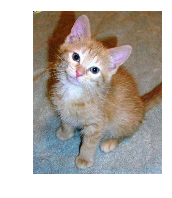

In [ ]:
def get_ex(): return open_image('imgs/cat_example.jpg')
get_ex().show()

Let's see how the defaults of [<code>get_transforms</code>](http://docs.fast.ai/vision.transform.html#get_transforms) change this little kitten now.

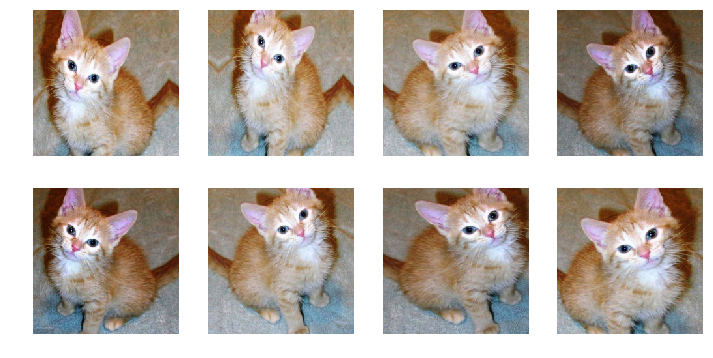

In [ ]:
tfms = get_transforms()
fig, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = apply_tfms(tfms[0], open_image('imgs/cat_example.jpg'), size=224)
    img.show(ax=ax)

Another useful function that gives basic transforms is:

In [ ]:
show_doc(zoom_crop, arg_comments={
    'scale': 'Ratio to which zoom the image',
    'do_rand': "If true, transform is randomized, otherwise it's a `zoom` of `scale` and a center crop",
    'p': 'Probability to apply the zoom'
})

#### <a id=zoom_crop></a>`zoom_crop`
(<code>scale</code>:<code>float</code>, <code>do_rand</code>:<code>bool</code>=`False`, <code>p</code>:<code>float</code>=`1.0`)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L108">[source]</a></div>


Randomly zoom and/or crop

- *scale*: Ratio to which zoom the image
- *do_rand*: If true, transform is randomized, otherwise it's a `zoom` of `scale` and a center crop
- *p*: Probability to apply the zoom

`scale` should be a given float if `do_rand` is false, otherwise it can be a range of floats (and the zoom will have a random value inbetween). Again, here is a sense of what this can give us.

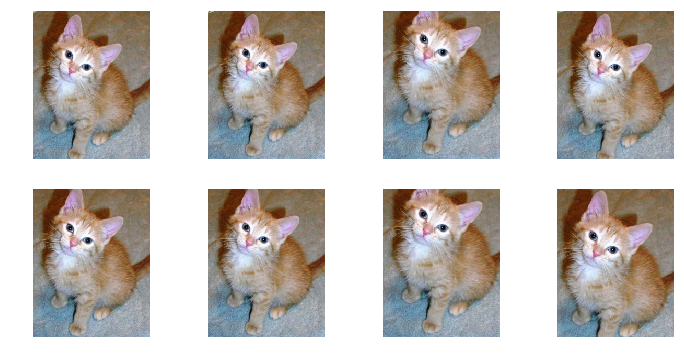

In [ ]:
tfms = zoom_crop(scale=(1.,1.2), do_rand=True)
fig, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = apply_tfms(tfms[0], get_ex(), size=224)
    img.show(ax=ax)

In [ ]:
show_doc(rand_resize_crop, ignore_warn=True, arg_comments={
    'size': 'Final size of the image',
    'max_scale': 'Zooms the image to a random scale up to this',
    'ratios': 'Range of ratios in which a new one will be randomly picked'
})

#### <a id=rand_resize_crop></a>`rand_resize_crop`
(<code>size</code>:<code>int</code>, <code>max_scale</code>:<code>float</code>=`2.0`, <code>ratios</code>:<code>Tuple</code>[<code>float</code>, <code>float</code>]=`(0.75, 1.33)`)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L224">[source]</a></div>


Randomly resizes and crop the image to a ratio in `ratios` after a zoom of `max_scale`

- *size*: Final size of the image
- *max_scale*: Zooms the image to a random scale up to this
- *ratios*: Range of ratios in which a new one will be randomly picked

This transforms determines a new width and height of the image after the random scale and squish to the new ratio are applied. Those are switched with probabilit 0.5, then we return the part of the image with the width and height computed centered in `row_pct`, `col_pct` if width and height are both less than the corresponding size of the image, otherwise we try again with new ranfom parameters.

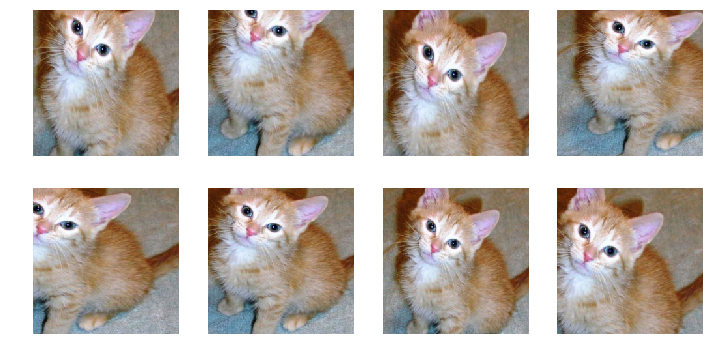

In [ ]:
tfm = rand_resize_crop(224)
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = apply_tfms(tfm, get_ex(), size=224)
    img.show(ax=ax)

## Randomness

The functions that define each transform, like [<code>rotate</code>](http://docs.fast.ai/vision.transform.html#rotate)or [<code>flip_lr</code>](http://docs.fast.ai/vision.transform.html#flip_lr) are deterministic. The fastai library will then randomize them in two different ways:
- each transform can be defined with an argument named `p` representing the probability for it to be applied
- each argument that is type-annoted with a random function (like [<code>uniform</code>](http://docs.fast.ai/vision.image.html#uniform) or [<code>rand_int</code>](http://docs.fast.ai/vision.image.html#rand_int)) can be replaced by a tuple of arguments accepted by this function, and on each call of the transform, the argument that is passed inside the function will be picked randomly using that random function.

If we look at the function [<code>rotate</code>](http://docs.fast.ai/vision.transform.html#rotate) for instance, we see it had an argument `degrees` that is type-annotated as uniform.

**First level of randomness:** We can define a transform using [<code>rotate</code>](http://docs.fast.ai/vision.transform.html#rotate) with `degrees` fixed to a value, but by passing an argument `p`. The rotation will then be executed with a probability of `p` but always with the same value of `degrees`.

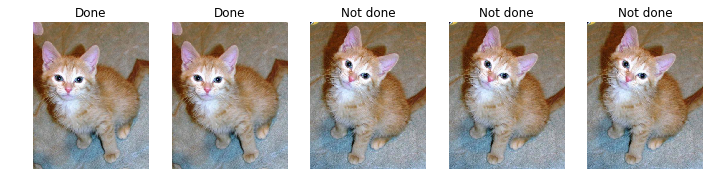

In [ ]:
tfm = [rotate(degrees=30, p=0.5)]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = apply_tfms(tfm, get_ex())
    title = 'Done' if tfm[0].do_run else 'Not done'
    img.show(ax=ax, title=title)

**Second level of randomness**: We can define a transform using [<code>rotate</code>](http://docs.fast.ai/vision.transform.html#rotate) with `degrees` defined as a range, without an argument `p`. The rotation will then always be executed with a random value picked uniformly between the two floats we put in `degrees`.

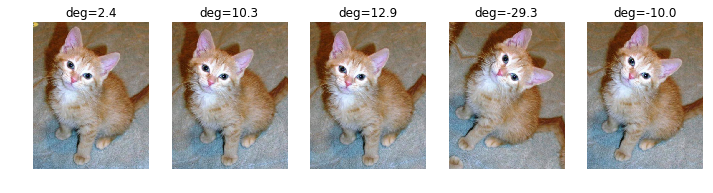

In [ ]:
tfm = [rotate(degrees=(-30,30))]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = apply_tfms(tfm, get_ex())
    title = f"deg={tfm[0].resolved['degrees']:.1f}"
    img.show(ax=ax, title=title)

**All combined**: We can define a transform using [<code>rotate</code>](http://docs.fast.ai/vision.transform.html#rotate) with `degrees` defined as a range, and an argument `p`. The rotation will then always be executed with a probability `p` and a random value picked uniformly between the two floats we put in `degrees`.

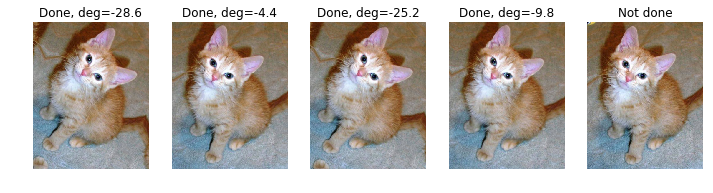

In [ ]:
tfm = [rotate(degrees=(-30,30), p=0.75)]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    img = apply_tfms(tfm, get_ex())
    title = f"Done, deg={tfm[0].resolved['degrees']:.1f}" if tfm[0].do_run else f'Not done'
    img.show(ax=ax, title=title)

## List of transforms

Here is the list of all the deterministic functions on which the transforms are built. As explained before, each of those can have a probability `p` of being executed, and any time an argument is type-annotated with a random function, it's possible to randomize it via that function.

In [ ]:
show_doc(brightness, ignore_warn=True, arg_comments={
    'x': 'Image to transform',
    'change': 'Value to adjust the brightness, should be between 0. and 1., 0.5 is neutral.'
})

#### <a id=brightness></a>`brightness`
(<code>x</code>, <code>change</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmLighting</code>](fastai.vision.image.html#TfmLighting)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L10">[source]</a></div>


`change` brightness of image `x`

- *x*: Image to transform
- *change*: Value to adjust the brightness, should be between 0. and 1., 0.5 is neutral.

This transform adjusts the brightness of the image depending of the value in `change`. A `change` of 0 will transform the image in black and a `change` of 1 will transform the image to white. 0.5 doesn't do anything.

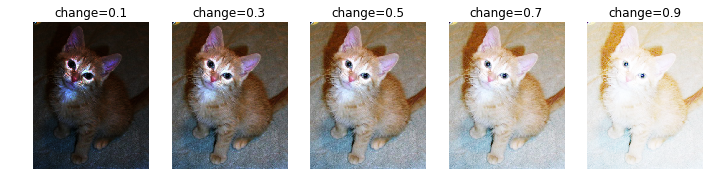

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for change, ax in zip(np.linspace(0.1,0.9,5), axs):
    brightness(get_ex(), change).show(ax=ax, title=f'change={change:.1f}')

In [ ]:
show_doc(contrast, ignore_warn=True, arg_comments={
    'x': 'Image to transform',
    'scale': 'Value to adjust the contrast, should be a positive number (1. is neutral)'
})

#### <a id=contrast></a>`contrast`
(<code>x</code>, <code>scale</code>:[<code>log_uniform</code>](fastai.vision.image.html#log_uniform)) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmLighting</code>](fastai.vision.image.html#TfmLighting)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L15">[source]</a></div>


`scale` contrast of image `x`

- *x*: Image to transform
- *scale*: Value to adjust the contrast, should be a positive number (1. is neutral)

This adjusts the contrast depending of the value in `scale`. A `scale` of 0 will transform the image in grey and a very high `scale` will transform the picture in super-contrast. 1. doesn't do anything.

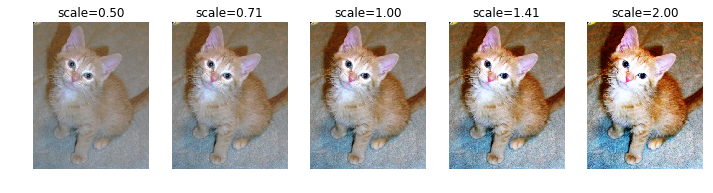

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
    contrast(get_ex(), scale).show(ax=ax, title=f'scale={scale:.2f}')

In [ ]:
show_doc(crop, ignore_warn=True, arg_comments={
    'x': 'Image to transform',
    'size': "Size of the crop, if it's an int, the crop will be square",
    'row_pct': 'Between 0. and 1., position of the center on the y axis (0. is top, 1. is bottom, 0.5 is center)',
    'col_pct': 'Between 0. and 1., position of the center on the x axis (0. is left, 1. is right, 0.5 is center)'
})

#### <a id=crop></a>`crop`
(<code>x</code>, <code>size</code>, <code>row_pct</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0.5`, <code>col_pct</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0.5`) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmPixel</code>](fastai.vision.image.html#TfmPixel)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L75">[source]</a></div>


Crop `x` to `size` pixels. `row_pct`,`col_pct` select focal point of crop

- *x*: Image to transform
- *size*: Size of the crop, if it's an int, the crop will be square
- *row_pct*: Between 0. and 1., position of the center on the y axis (0. is top, 1. is bottom, 0.5 is center)
- *col_pct*: Between 0. and 1., position of the center on the x axis (0. is left, 1. is right, 0.5 is center)

This transform takes a crop of the image to return one of the given size. The position is given by `(col_pct, row_pct)`, with `col_pct` and `row_pct` being normalized between 0. and 1.

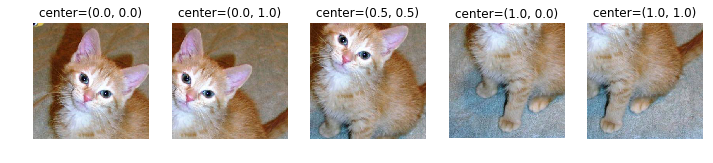

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for center, ax in zip([[0.,0.], [0.,1.],[0.5,0.5],[1.,0.], [1.,1.]], axs):
    crop(get_ex(), 300, *center).show(ax=ax, title=f'center=({center[0]}, {center[1]})')

In [ ]:
show_doc(crop_pad, ignore_warn=True, arg_comments={
    'x': 'Image to transform',
    'size': "Size of the crop, if it's an int, the crop will be square",
    'padding_mode': "How to pad the output image ('zeros', 'border' or 'reflection')",
    'row_pct': 'Between 0. and 1., position of the center on the y axis (0. is top, 1. is bottom, 0.5 is center)',
    'col_pct': 'Between 0. and 1., position of the center on the x axis (0. is left, 1. is right, 0.5 is center)'
})

#### <a id=crop_pad></a>`crop_pad`
(<code>x</code>, <code>size</code>, <code>padding_mode</code>=`'reflection'`, <code>row_pct</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0.5`, <code>col_pct</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0.5`) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmCrop</code>](fastai.vision.image.html#TfmCrop)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L84">[source]</a></div>


Crop and pad tfm - `row_pct`,`col_pct` sets focal point

- *x*: Image to transform
- *size*: Size of the crop, if it's an int, the crop will be square
- *padding_mode*: How to pad the output image ('zeros', 'border' or 'reflection')
- *row_pct*: Between 0. and 1., position of the center on the y axis (0. is top, 1. is bottom, 0.5 is center)
- *col_pct*: Between 0. and 1., position of the center on the x axis (0. is left, 1. is right, 0.5 is center)

This works like [<code>crop</code>](http://docs.fast.ai/vision.transform.html#crop) but if the target size is bigger than the size of the image (on one or the other dimension), padding is applied according to `padding_mode` (see [<code>pad</code>](http://docs.fast.ai/vision.transform.html#pad) for an example of all the options) and the position of center is ignored on that dimension.

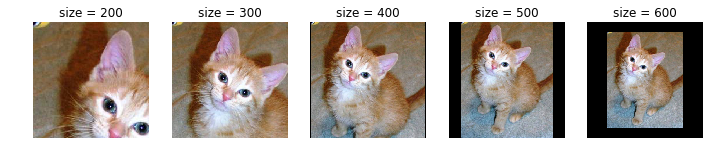

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for size, ax in zip(np.linspace(200,600,5), axs):
    crop_pad(get_ex(), int(size), 'zeros', 0.,0.).show(ax=ax, title=f'size = {int(size)}')

In [ ]:
show_doc(dihedral, ignore_warn=True, arg_comments={
    'x': 'Image to transform',
    'k': 'Integer between 0 and 7 that represents one of the 8 dihedral transformations possible'
})

#### <a id=dihedral></a>`dihedral`
(<code>x</code>, <code>k</code>:<code>partial</code>) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmPixel</code>](fastai.vision.image.html#TfmPixel)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L59">[source]</a></div>


Randomly flip `x` image based on k

- *x*: Image to transform
- *k*: Integer between 0 and 7 that represents one of the 8 dihedral transformations possible

This transform applies one of all the transformations possible of the image by combining a flip (horizontal or vertical) and a rotation of a multiple of 90 degrees.

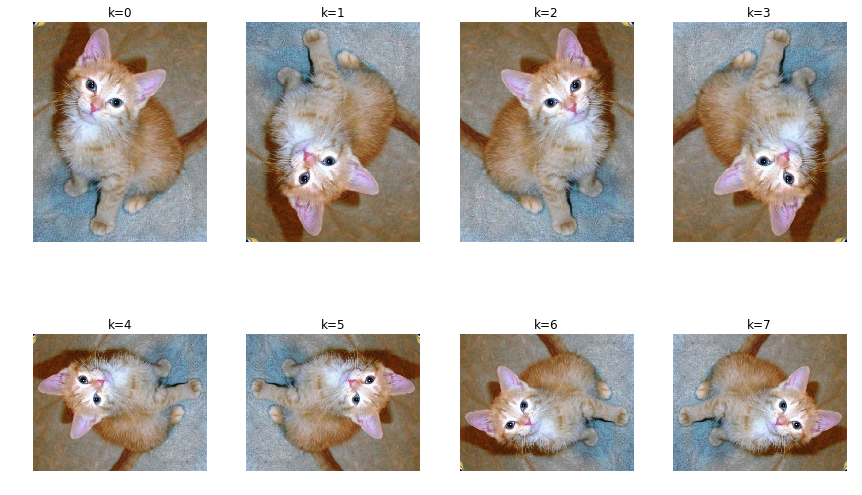

In [ ]:
fig, axs = plt.subplots(2,4,figsize=(12,8))
for k, ax in enumerate(axs.flatten()):
    dihedral(get_ex(), k).show(ax=ax, title=f'k={k}')
plt.tight_layout()

In [ ]:
show_doc(flip_lr, ignore_warn=True, arg_comments={
    'x': 'Image to transform'
})

#### <a id=flip_lr></a>`flip_lr`
(<code>x</code>) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmPixel</code>](fastai.vision.image.html#TfmPixel)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L56">[source]</a></div>


- *x*: Image to transform

This transform horizontally flips the image.

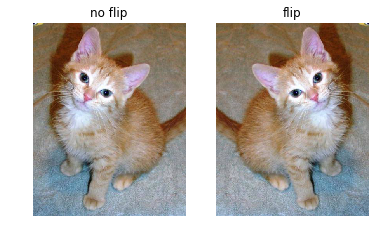

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6,4))
get_ex().show(ax=axs[0], title=f'no flip')
flip_lr(get_ex()).show(ax=axs[1], title=f'flip')

In [ ]:
show_doc(jitter, ignore_warn=True, arg_comments={
    'c': 'Coords to transform (automatically passed by the fastai pipeline)',
    'img_size': 'Size of the image (automatically passed by the fastai pipeline)',
    'magnitude': 'Strength of the jitter'
})

#### <a id=jitter></a>`jitter`
(<code>c</code>, <code>img_size</code>, <code>magnitude</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmCoord</code>](fastai.vision.image.html#TfmCoord)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L52">[source]</a></div>


- *c*: Coords to transform (automatically passed by the fastai pipeline)
- *img_size*: Size of the image (automatically passed by the fastai pipeline)
- *magnitude*: Strength of the jitter

This transform changes the pixels of the image by randomly replacing them with pixels from the neighborhood (how far we go is controlled by the value of `magnitude`).

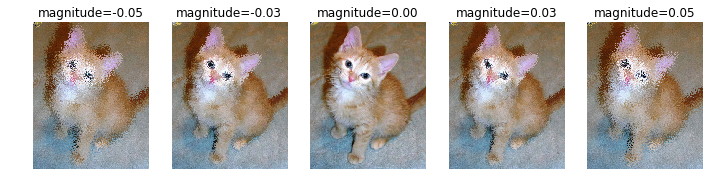

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfm = jitter(magnitude=magnitude)
    get_ex().jitter(magnitude).show(ax=ax, title=f'magnitude={magnitude:.2f}')

In [ ]:
show_doc(pad, ignore_warn=True, arg_comments={
    'x': 'Image to transform',
    'padding': 'Padding to add on each side of the picture',
    'mode': 'Padding mode (constant, reflect or replicate)'
})

#### <a id=pad></a>`pad`
(<code>x</code>, <code>padding</code>, <code>mode</code>=`'reflection'`) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmPixel</code>](fastai.vision.image.html#TfmPixel)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L69">[source]</a></div>


Pad `x` with `padding` pixels. `mode` fills in space ('zeros','reflection','border')

- *x*: Image to transform
- *padding*: Padding to add on each side of the picture
- *mode*: Padding mode (constant, reflect or replicate)

Pads the image by adding `padding` pixel on each side of the picture accordin to `mode`:
- `mode` = zeros pads with zeros, 
- `mode` = border repeats the pixels at the border.
- `mode` = reflection pads by taking the pixels symmetric to the border.

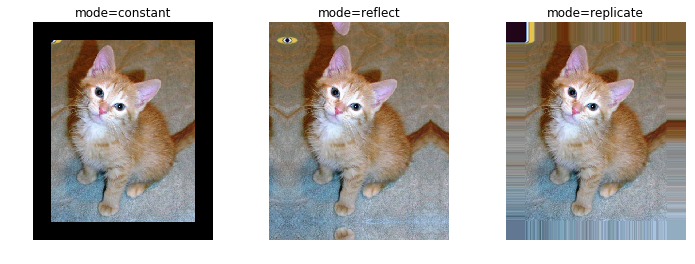

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(12,4))
for mode, ax in zip(['constant', 'reflect', 'replicate'], axs):
    pad(get_ex(), 50, mode).show(ax=ax, title=f'mode={mode}')

In [ ]:
show_doc(perspective_warp, ignore_warn=True, arg_comments={
    'c': 'Coords to transform (automatically passed by the fastai pipeline)',
    'img_size': 'Size of the image (automatically passed by the fastai pipeline)',
    'magnitude': 'Vector of eight coordinates explaining how to transform each corner'
})

#### <a id=perspective_warp></a>`perspective_warp`
(<code>c</code>, <code>img_size</code>, <code>magnitude</code>:<code>partial</code>=`0`) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmCoord</code>](fastai.vision.image.html#TfmCoord)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L144">[source]</a></div>


Apply warp to `c` and with size `img_size` with `magnitude` amount

- *c*: Coords to transform (automatically passed by the fastai pipeline)
- *img_size*: Size of the image (automatically passed by the fastai pipeline)
- *magnitude*: Vector of eight coordinates explaining how to transform each corner

Perspective wrapping is a deformation of the image as it was seen in a different plane of the 3D-plane. The new plane is determined by telling where we want each of the four corners of the image (from -1 to 1, -1 being left/top, 1 being right/bottom).

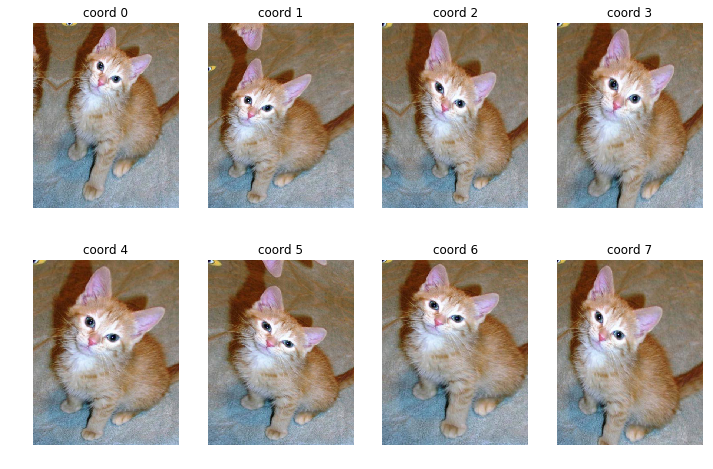

In [ ]:
fig, axs = plt.subplots(2,4,figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    magnitudes = torch.tensor(np.zeros(8))
    magnitudes[i] = 0.5
    perspective_warp(get_ex(), magnitudes).show(ax=ax, title=f'coord {i}')

In [ ]:
show_doc(rotate, ignore_warn=True, arg_comments={
    'degrees': 'Angle to use to rotate the image'
})

#### <a id=rotate></a>`rotate`
(<code>degrees</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmAffine</code>](fastai.vision.image.html#TfmAffine)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L20">[source]</a></div>


Affine func that rotates the image

- *degrees*: Angle to use to rotate the image

Rotates the image by a certain amount of degrees.

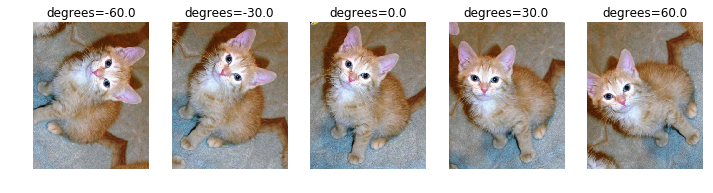

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for deg, ax in zip(np.linspace(-60,60,5), axs):
    get_ex().rotate(degrees=deg).show(ax=ax, title=f'degrees={deg}')

In [ ]:
show_doc(skew, ignore_warn=True, arg_comments={
    'c': 'Coords to transform (automatically passed by the fastai pipeline)',
    'img_size': 'Size of the image (automatically passed by the fastai pipeline)',
    'direction': 'One of the eights skews possible',
    'magnitude': 'Strength of the skew'
})

#### <a id=skew></a>`skew`
(<code>c</code>, <code>img_size</code>, <code>direction</code>:[<code>rand_int</code>](fastai.vision.image.html#rand_int), <code>magnitude</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0`) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmCoord</code>](fastai.vision.image.html#TfmCoord)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L170">[source]</a></div>


Skew `c` field and resize to`img_size` with random `direction` and `magnitude`

- *c*: Coords to transform (automatically passed by the fastai pipeline)
- *img_size*: Size of the image (automatically passed by the fastai pipeline)
- *direction*: One of the eights skews possible
- *magnitude*: Strength of the skew

Skews the image in a given`direction` by a certain order of `magnitude`.

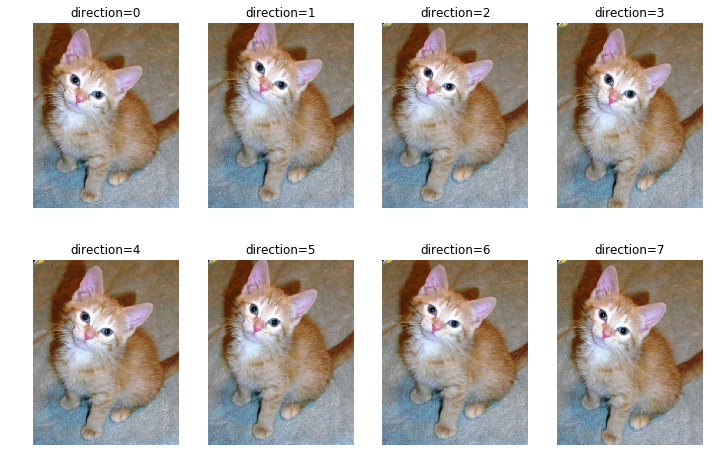

In [ ]:
fig, axs = plt.subplots(2,4,figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    get_ex().skew(i, 0.2).show(ax=ax, title=f'direction={i}')

In [ ]:
show_doc(squish, ignore_warn=True, arg_comments={
    'scale': 'Ratio to which squish the image',
    'row_pct': 'Between 0. and 1., position of the center on the y axis (0. is top, 1. is bottom, 0.5 is center)',
    'col_pct': 'Between 0. and 1., position of the center on the x axis (0. is left, 1. is right, 0.5 is center)'
})

#### <a id=squish></a>`squish`
(<code>scale</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`1.0`, <code>row_pct</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0.5`, <code>col_pct</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0.5`) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmAffine</code>](fastai.vision.image.html#TfmAffine)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L42">[source]</a></div>


Squish image by `scale`. `row_pct`,`col_pct` select focal point of zoom

- *scale*: Ratio to which squish the image
- *row_pct*: Between 0. and 1., position of the center on the y axis (0. is top, 1. is bottom, 0.5 is center)
- *col_pct*: Between 0. and 1., position of the center on the x axis (0. is left, 1. is right, 0.5 is center)

Squishes the image with the value in `scale`, with the center being given by `row_pct,col_pct`.

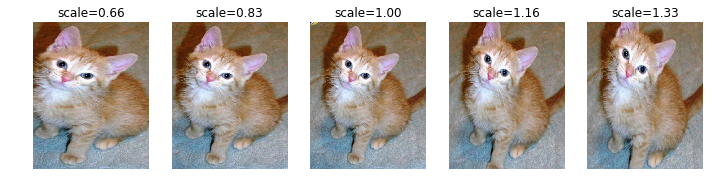

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.linspace(0.66,1.33,5), axs):
    get_ex().squish(scale=scale).show(ax=ax, title=f'scale={scale:.2f}')

In [ ]:
show_doc(symmetric_warp, ignore_warn=True, arg_comments={
    'c': 'Coords to transform (automatically passed by the fastai pipeline)',
    'img_size': 'Size of the image (automatically passed by the fastai pipeline)',
    'magnitude': 'Vector of 4 coordinates for the strength in each corner'
})

#### <a id=symmetric_warp></a>`symmetric_warp`
(<code>c</code>, <code>img_size</code>, <code>magnitude</code>:<code>partial</code>=`0`) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmCoord</code>](fastai.vision.image.html#TfmCoord)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L152">[source]</a></div>


Apply warp to `c` with size `img_size` and `magnitude` amount

- *c*: Coords to transform (automatically passed by the fastai pipeline)
- *img_size*: Size of the image (automatically passed by the fastai pipeline)
- *magnitude*: Vector of 4 coordinates for the strength in each corner

Apply the four tilts at the same time, each with a strength given in the vector `magnitude`. See [<code>tilt</code>](http://docs.fast.ai/vision.transform.html#tilt) just below for the effect of each individual tilt.

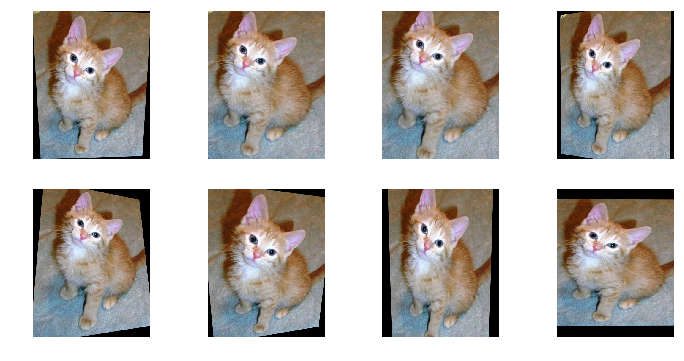

In [ ]:
tfm = symmetric_warp(magnitude=(-0.2,0.2))
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = apply_tfms(tfm, get_ex(), padding_mode='zeros')
    img.show(ax=ax)

In [ ]:
show_doc(tilt, ignore_warn=True, arg_comments={
    'c': 'Coords to transform (automatically passed by the fastai pipeline)',
    'img_size': 'Size of the image (automatically passed by the fastai pipeline)',
    'direction': 'Integer between 0 and 3',
    'magnitude': 'Strength of the tilt'
})

#### <a id=tilt></a>`tilt`
(<code>c</code>, <code>img_size</code>, <code>direction</code>:[<code>rand_int</code>](fastai.vision.image.html#rand_int), <code>magnitude</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0`) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmCoord</code>](fastai.vision.image.html#TfmCoord)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L159">[source]</a></div>


Tilt `c` field and resize to`img_size` with random `direction` and `magnitude`

- *c*: Coords to transform (automatically passed by the fastai pipeline)
- *img_size*: Size of the image (automatically passed by the fastai pipeline)
- *direction*: Integer between 0 and 3
- *magnitude*: Strength of the tilt

Tilts the image in the `direction` given (0: left, 1: right, 2: top, 3: bottom) with a certain `magnitude`. A positive number is a tilt forward (toward the person looking at the picture), a negative number a tilt backward.

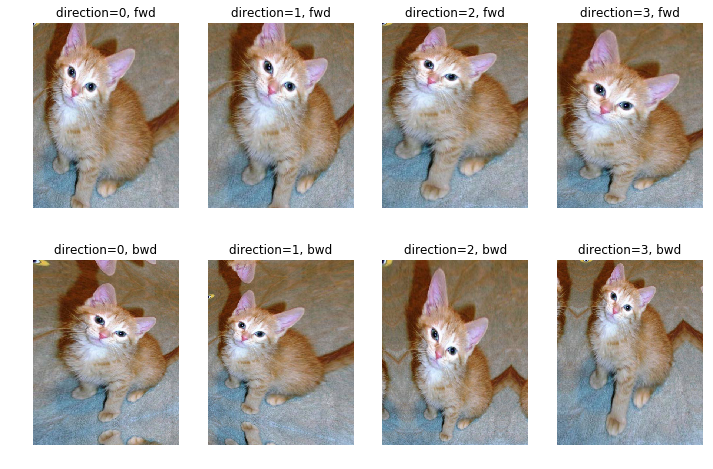

In [ ]:
fig, axs = plt.subplots(2,4,figsize=(12,8))
for i in range(4):
    get_ex().tilt(i, 0.4).show(ax=axs[0,i], title=f'direction={i}, fwd')
    get_ex().tilt(i, -0.4).show(ax=axs[1,i], title=f'direction={i}, bwd')

In [ ]:
show_doc(zoom, ignore_warn=True, arg_comments={
    'scale': 'Ratio to which zoom the image',
    'row_pct': 'Between 0. and 1., position of the center on the y axis (0. is top, 1. is bottom, 0.5 is center)',
    'col_pct': 'Between 0. and 1., position of the center on the x axis (0. is left, 1. is right, 0.5 is center)'
})

#### <a id=zoom></a>`zoom`
(<code>scale</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`1.0`, <code>row_pct</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0.5`, <code>col_pct</code>:[<code>uniform</code>](fastai.vision.image.html#uniform)=`0.5`) -> [<code>Image</code>](fastai.vision.image.html#Image) :: [<code>TfmAffine</code>](fastai.vision.image.html#TfmAffine)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/transform.py#L34">[source]</a></div>


Zoom image by `scale`. `row_pct`,`col_pct` select focal point of zoom

- *scale*: Ratio to which zoom the image
- *row_pct*: Between 0. and 1., position of the center on the y axis (0. is top, 1. is bottom, 0.5 is center)
- *col_pct*: Between 0. and 1., position of the center on the x axis (0. is left, 1. is right, 0.5 is center)

Zooms the image with the value in `scale`, the center being given by `row_pct`,`col_pct`.

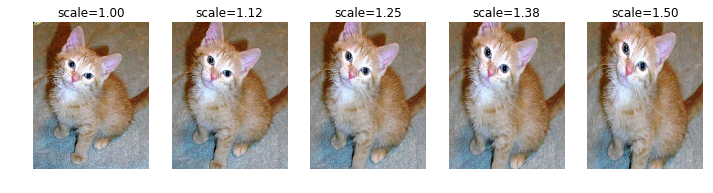

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.linspace(1., 1.5,5), axs):
    get_ex().squish(scale=scale).show(ax=ax, title=f'scale={scale:.2f}')

### Last random functions

In [ ]:
show_doc(rand_crop)

#### <a id=rand_crop></a>`rand_crop`(`args`, `kwargs`)<div style="text-align: right"><a href="..\fastai\vision\transform.py#L102">[source]</a></div>


Random crop and pad

Returns a randomized version of [<code>crop_pad</code>](http://docs.fast.ai/vision.transform.html#crop_pad).

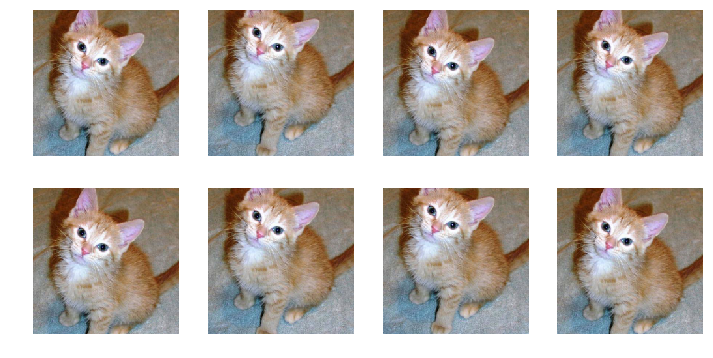

In [ ]:
tfm = rand_crop()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = apply_tfms(tfm, get_ex(), size=224)
    img.show(ax=ax)

In [ ]:
show_doc(rand_zoom)

#### <a id=rand_zoom></a>`rand_zoom`(`args`, `kwargs`)<div style="text-align: right"><a href="..\fastai\vision\transform.py#L99">[source]</a></div>


Random zoom tfm

Returns a randomized version of [<code>zoom</code>](http://docs.fast.ai/vision.transform.html#zoom).

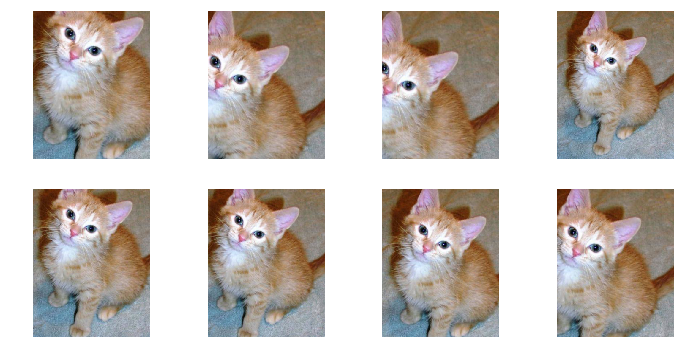

In [ ]:
tfm = rand_zoom(scale=(1.,1.5))
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = apply_tfms(tfm, get_ex())
    img.show(ax=ax)